In [3]:
import re
import os
from progressbar import progressbar
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [10]:
DATA_PATH = "Cranfield/crans.txt"

In [11]:
raw_text = open(DATA_PATH).read()

In [12]:
pattern = re.compile(r"\.W.+?\.I", re.DOTALL)
all_texts = re.findall(pattern, raw_text)

In [13]:
all_texts.append("""
the buckling shear stress of simply-supported infinitely
long plates with transverse stiffeners .
  this report is an extension of previous theoretical
investigations of the elastic buckling in shear of flat
plates reinforced by transverse stiffeners . the plates are treated
as infinitely long and simply-supported along the long
sides . stiffeners are spaced at regular intervals, dividing the plate
into a number of panels of uniform size . the effect
ob bending and torsional stiffnesses of the stiffener upon the buckling
shear stress is calculated for the complete range
of stiffnesses, for panels with ratios of width to stiffener spacing of
graphical forms .
""")

In [14]:
def parse_text(text: str, min_length=4)->list:
    pattern = re.compile(r"\w+[-|']{0,1}\w+")
    tokens = re.findall(pattern, text)
    return [token for token in tokens if len(token)>=min_length]

In [93]:
all_tokens = list(map(parse_text, all_texts))
print(len(all_tokens))
a_t = []
for i in all_tokens:
    for j in i:
        a_t.append(j)
len(a_t)
#a_t

1400


135611

In [101]:
vocab = []
def vocabulary(tokens):
    for token in tokens:
        if token in vocab:
            continue
        else:
            vocab.append(token)
vocabulary(a_t)

In [104]:
N, M = len(all_tokens), len(vocab)
print(N,M)

1400 8346


In [105]:
term_freq = np.array([[tokenset.count(term) for tokenset in a_t] for term in vocab])


 that
 flow


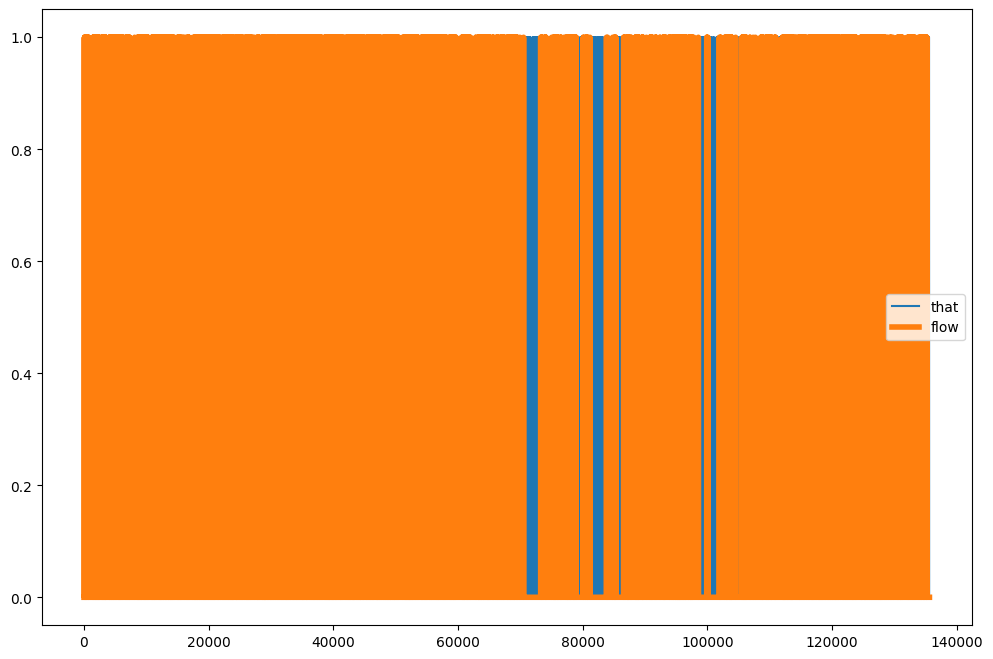

In [108]:
plot1 = input()
plot2 = input()
plt.plot(term_freq[vocab.index(plot1)])
plt.plot(term_freq[vocab.index(plot2)], linewidth=4)
plt.legend([plot1, plot2])
plt.gcf().set_size_inches(12, 8)
plt.show()

In [109]:
df = np.zeros(term_freq.shape)
df[term_freq>0]=1
idf = np.log(N)/np.sum(df, axis=1).reshape((M, 1))

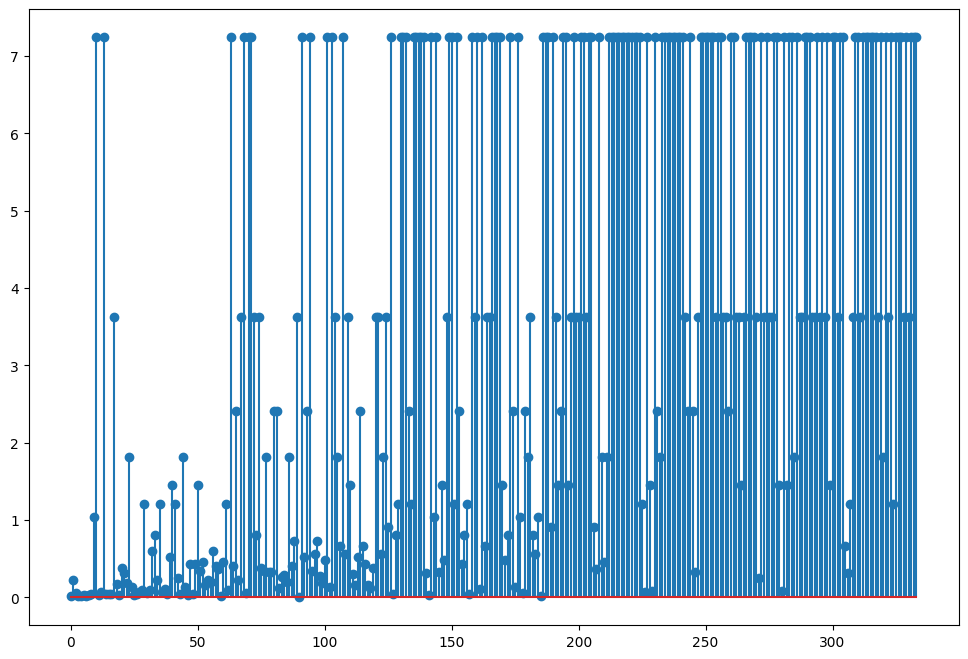

In [110]:
plt.stem(idf[::25])
plt.gcf().set_size_inches(12, 8)

In [111]:
tf_idf = term_freq*idf
tf_idf.shape


(8346, 135611)

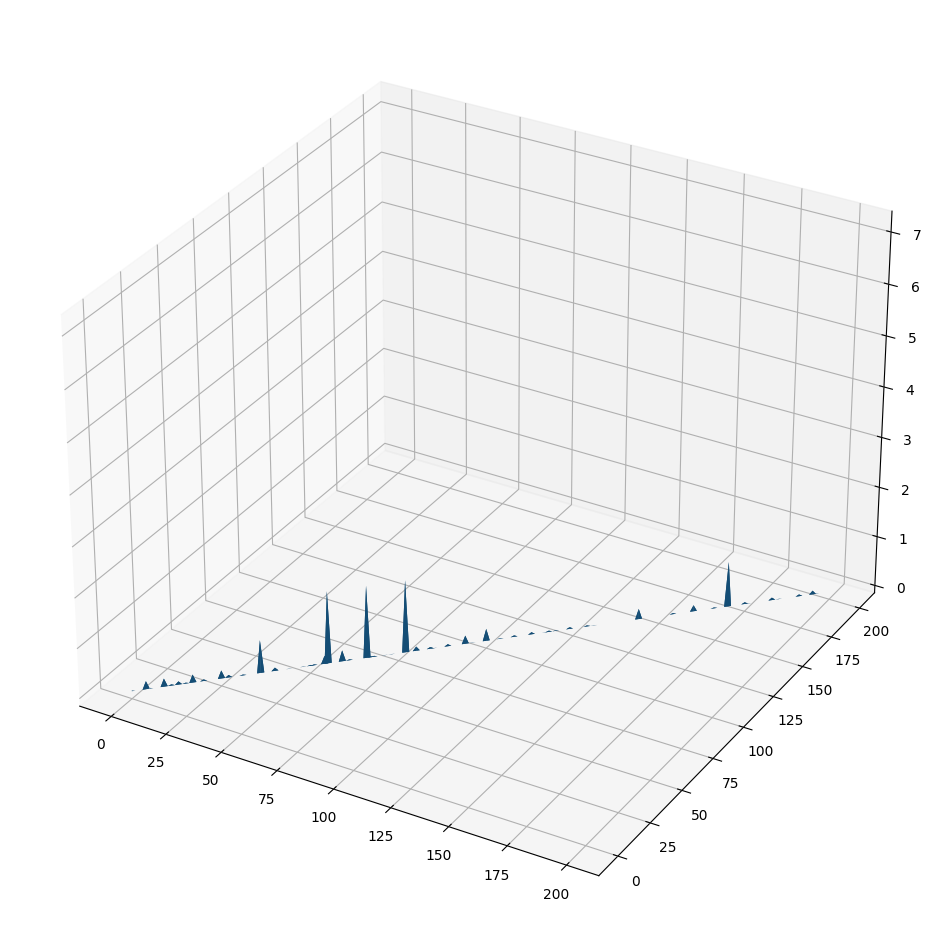

In [113]:
fig = plt.subplot(projection='3d')
Axes3D.plot_surface(plt.gca(), range(200), range(200), tf_idf[:200, :200])
plt.gcf().set_size_inches(12, 12)

In [114]:
query = "what are the different aerodynamic components"
query = parse_text(query)

In [116]:
query_vector = np.array([1 if vocab[i] in query else 0 for i in range(M)]).T

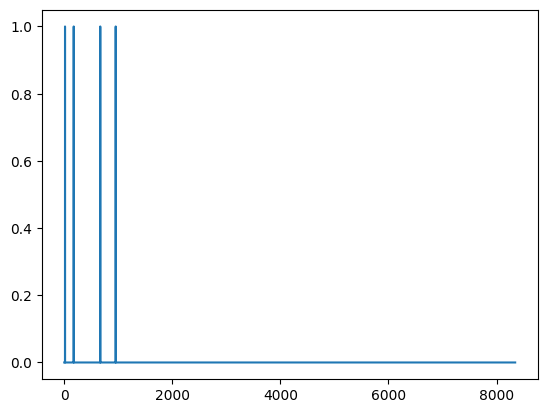

In [117]:
plt.plot(query_vector)

In [118]:
def cosine_similarity(q_vector, d_vector):
    return np.sum(q_vector.T*d_vector.T)

In [119]:
scores = []
for i in range(N):
    if len(all_tokens[i])>0:
        scores.append(cosine_similarity(query_vector, tf_idf[:, i])/len(all_tokens[i]))
    else:
        scores.append(0)
scores = np.array(scores)

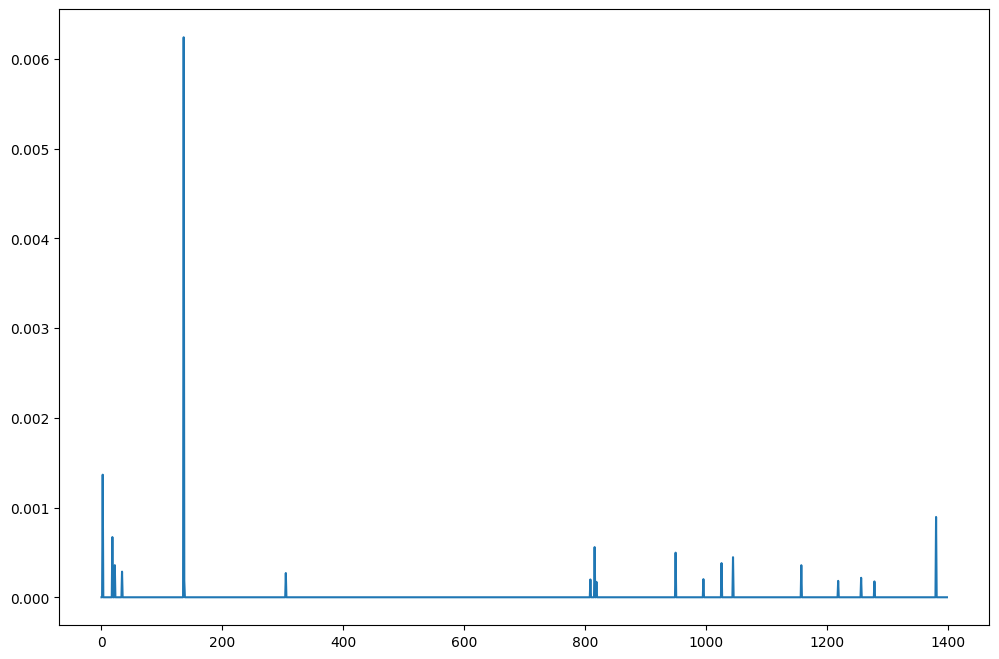

In [120]:
plt.plot(scores)
plt.gcf().set_size_inches(12, 8)

In [121]:
fetches = np.argsort(scores)[-5:][::-1]

In [122]:
fetches+1

array([ 137,    3, 1382,   19,  817])

In [123]:
len(all_texts)


1400

In [72]:
DIR = "Cranfield_extract"

In [75]:
for i in range(len(all_texts)):
    file = open(DIR + "/%d.txt"%(i),'w')
    file.write(all_texts[i])

In [112]:
tf_idf

array([[0.01544611, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02118195, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.27862414, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])